# Data Ingestion

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

In [4]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

0

# EDA

In [8]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
185,186,Male,30,99,97
62,63,Female,67,47,52
42,43,Male,48,39,36
173,174,Male,36,87,92
167,168,Female,33,86,95


#### 𝐀𝐭𝐭𝐫𝐢𝐛𝐮𝐭𝐞𝐬 𝐢𝐧𝐟𝐨𝐫𝐦𝐚𝐭𝐢𝐨𝐧:
    * CustomerID - Id of the customer of a mall.
    * Gender - Gender of the customer.
    * Age - Age of the customer.
    * Annual Income (k$) - Annual Income of the customer in thousand dollars.
    * Spending Score(1-100) - Spending score of the customer on the scale 1-100.

In [12]:
#shape of the datset
df.shape

(200, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#checking the correlation between the features
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Distribution of the data

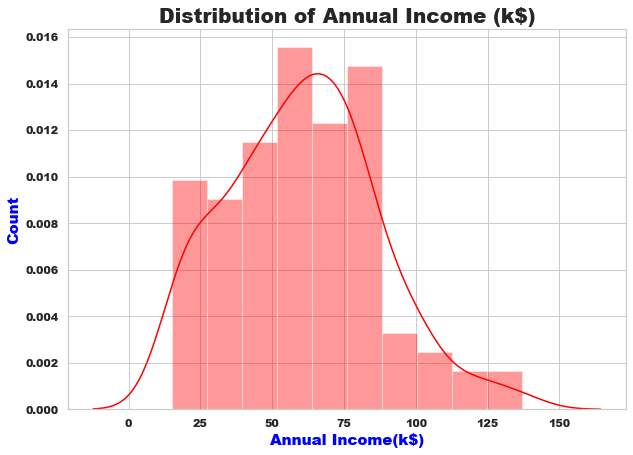

In [16]:
#Distribution of annual income

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(df['Annual Income (k$)'],color ='red')
plt.title("Distribution of Annual Income (k$)",fontsize=20)
plt.xlabel("Annual Income(k$)",fontsize=15,color='blue')
plt.ylabel("Count",fontsize=15,color='blue')
plt.show()

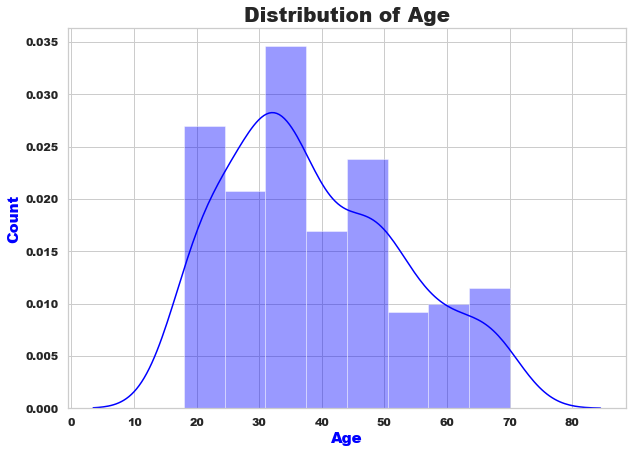

In [17]:
#Distribution of Age

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(df['Age'],color='blue')
plt.title("Distribution of Age",fontsize=20)
plt.xlabel("Age",fontsize=15,color='blue')
plt.ylabel("Count",fontsize=15,color='blue')
plt.show()

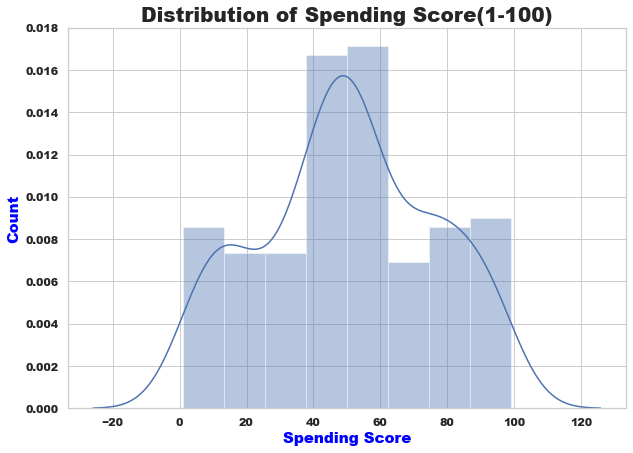

In [18]:
#Distribution of the Spending score (1-100))

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(df['Spending Score (1-100)'])
plt.title("Distribution of Spending Score(1-100)",fontsize=20)
plt.xlabel("Spending Score",fontsize=15,color='blue')
plt.ylabel("Count",fontsize=15,color='blue')
plt.show()

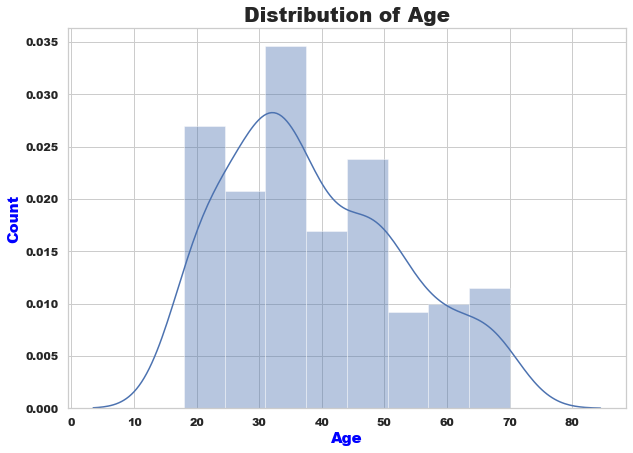

In [19]:
#Distrubution og Age

plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.distplot(df['Age'])
plt.title("Distribution of Age",fontsize=20)
plt.xlabel('Age',fontsize=15,color='blue')
plt.ylabel('Count',fontsize=15,color='blue')
plt.show()

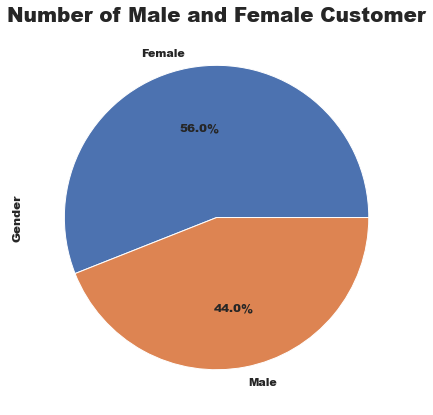

In [20]:
#Checking for Gender

plt.figure(figsize=(10,7))
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Number of Male and Female Customer",fontsize=20)
plt.show()

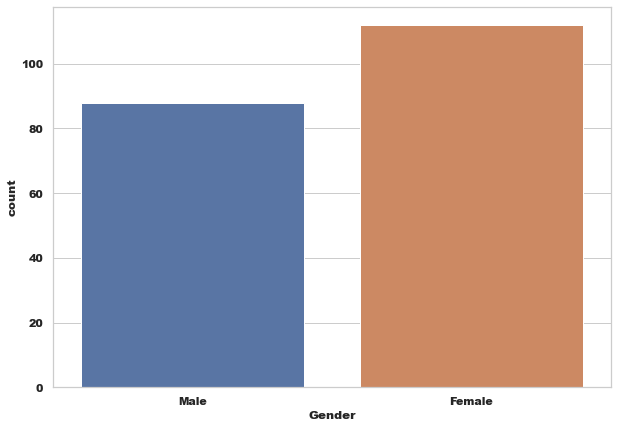

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=df)
plt.show()

<Figure size 1080x1080 with 0 Axes>

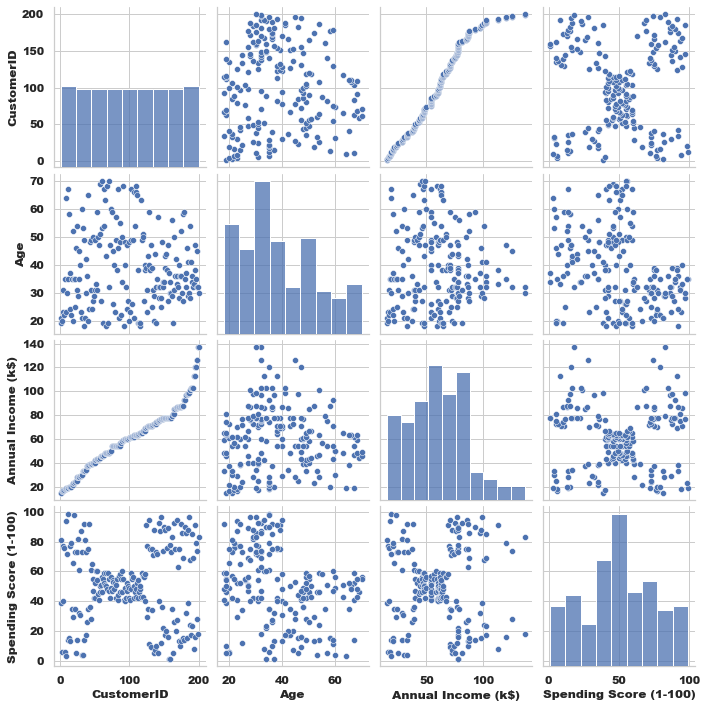

In [24]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.show()

# Building the models

## 1. KMeans Clustering

In [25]:
# Importing Kmeans
from sklearn.cluster import KMeans

In [26]:
X=df[['Annual Income (k$)','Spending Score (1-100)']] #for 2D data

In [28]:
#for finding the best value of k by using the plot between wcss vs k value
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

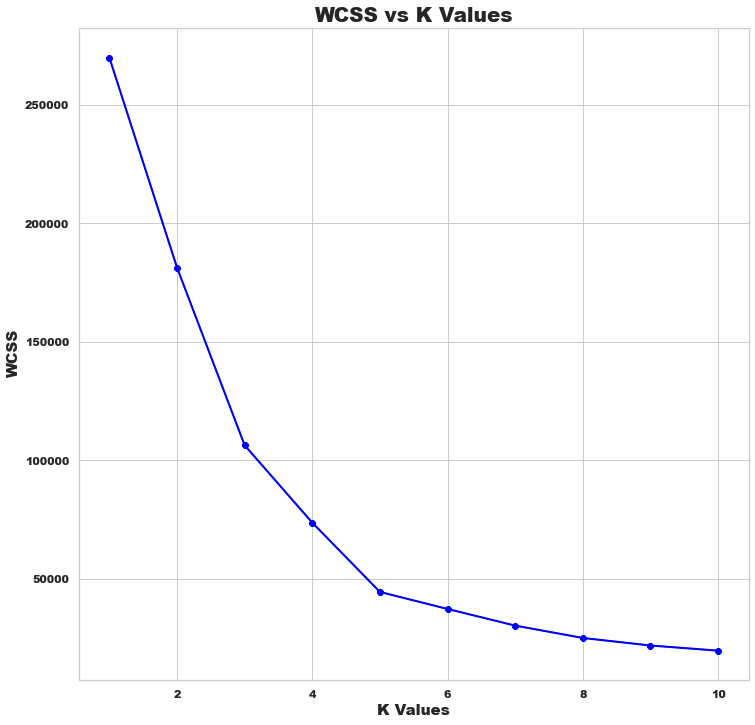

In [30]:
#the elbow curve for finding the best value of K or for no of cluster.

plt.figure(figsize=(12,12))
plt.plot(range(1,11),wcss)
plt.title("WCSS vs K Values",fontsize='20')
plt.xlabel("K Values",fontsize='15')
plt.ylabel("WCSS",fontsize='15')
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.show()

In [31]:
#Taking 5 clusters bcz after  k=5 there is sudden drop

k_means=KMeans(n_clusters=5)
k_means.fit(X)

KMeans(n_clusters=5)

In [33]:
#predicting the labels of the input data
y=k_means.predict(X)
df1=df #creating a copy of df
df1['label']=y

In [34]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


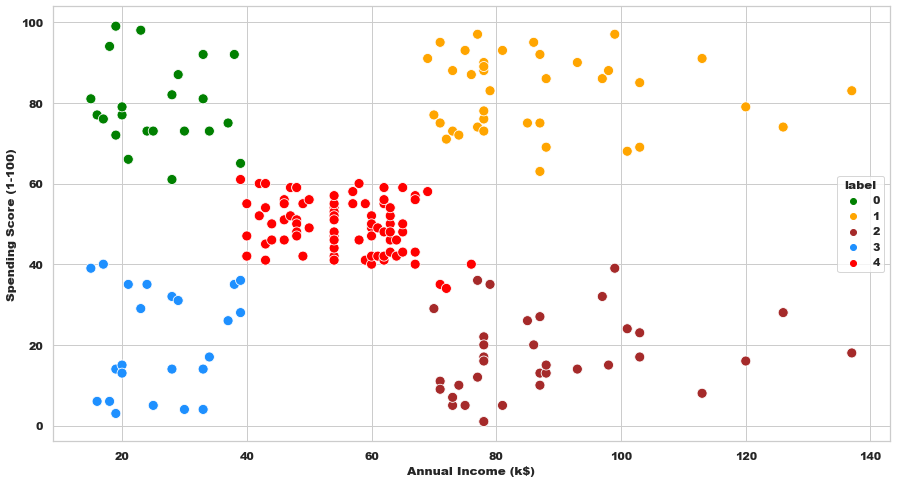

In [35]:
#plotting the cluster
plt.figure(figsize=(15,8))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',data=df1,palette=['green','orange','brown','dodgerblue','red'],s=100)
plt.show()

In [36]:
#Printing the customer-id as per the label

cust1=df1[df1["label"]==1]
print('Number of customer in 1st group(yellow)=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("********************************************************************************************************************")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group(brown)=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("********************************************************************************************************************")
cust3=df1[df1["label"]==3]
print('Number of customer in 3rd group(blue)=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("********************************************************************************************************************")
cust4=df1[df1["label"]==4]
print('Number of customer in 4th group(red)=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("********************************************************************************************************************")
cust5=df1[df1["label"]==0]
print('Number of customer in 5th group(green)=', len(cust5))
print('They are -', cust5["CustomerID"].values)

Number of customer in 1st group(yellow)= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
********************************************************************************************************************
Number of customer in 2nd group(brown)= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
********************************************************************************************************************
Number of customer in 3rd group(blue)= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
********************************************************************************************************************
Number of customer in 4th group(red)= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60 

In [37]:
#NOW clustering on the basis of 3D data

X1=df1[['Annual Income (k$)','Spending Score (1-100)','Age']]

In [38]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k for 3D data

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

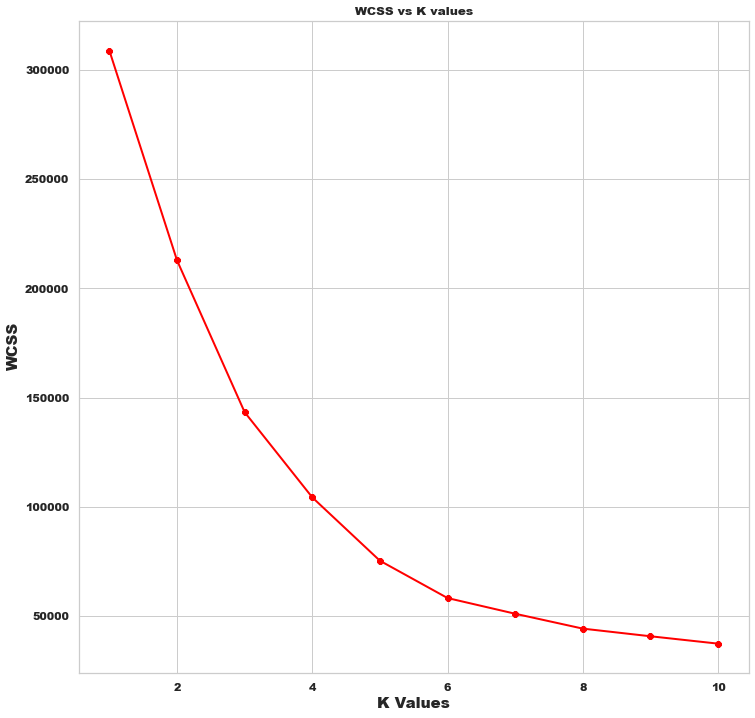

In [39]:
plt.figure(figsize=(12,12))
plt.plot(range(1,11,1),wcss,linewidth='2',marker='8',color='red')
plt.title("WCSS vs K values")
plt.xlabel("K Values",fontsize=15)
plt.ylabel("WCSS",fontsize=15)
plt.show()

In [40]:
#again taking 5 clusters
km2=KMeans(n_clusters=5)
km2.fit(X1)

KMeans(n_clusters=5)

In [41]:
y1=km2.predict(X1)
df2=df
df2['label']=y1

In [42]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


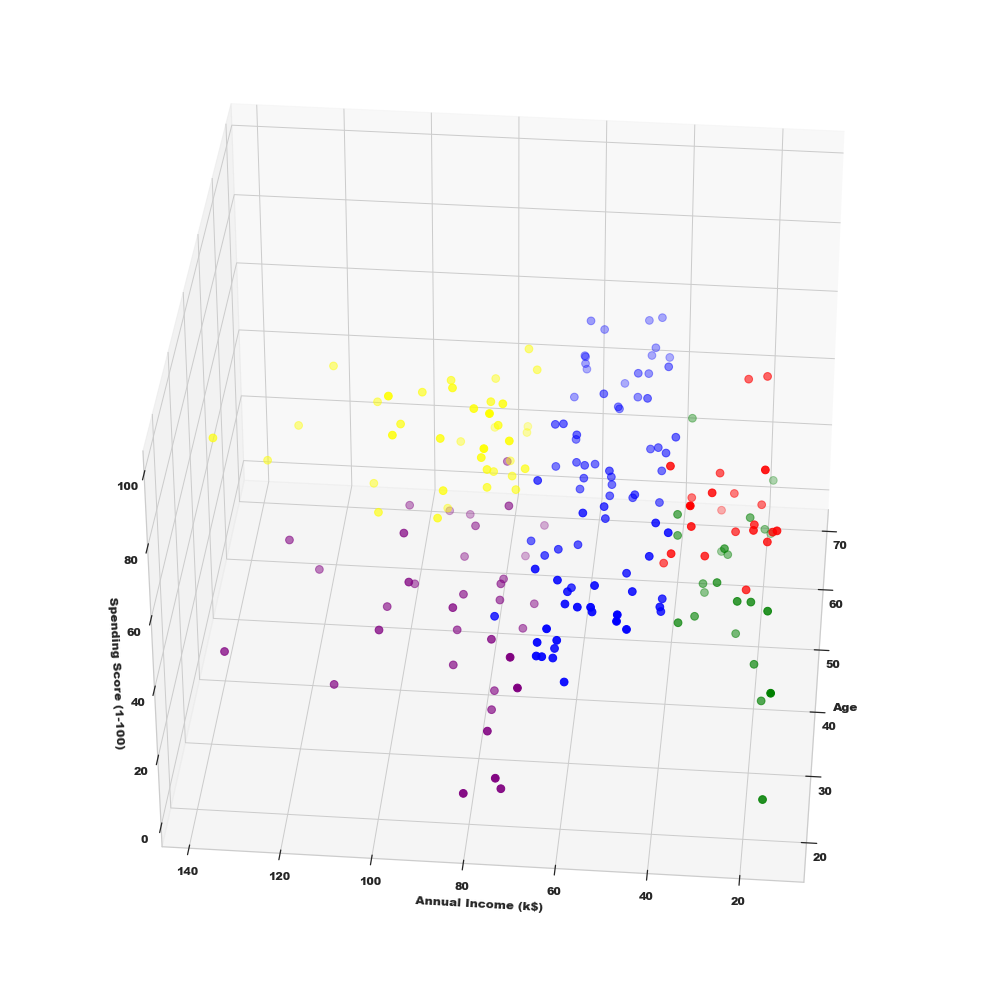

In [43]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [44]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("********************************************************************************************************************")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("********************************************************************************************************************")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("********************************************************************************************************************")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("********************************************************************************************************************")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)

Number of customer in 1st group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
********************************************************************************************************************
Number of customer in 2nd group= 80
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 143]
********************************************************************************************************************
Number of customer in 3rd group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
************************************************************************************

In [45]:
import joblib

In [46]:
joblib.dump(k_means,"Customer_Segmentation")

['Customer_Segmentation']

In [47]:
model=joblib.load("Customer_Segmentation")

In [48]:
model.predict([[15,19]])

array([3])

### 2. DBSCAN Clustering

In [49]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'label'],
      dtype='object')

In [50]:
X=df.loc[:,'Annual Income (k$)':'Spending Score (1-100)'].values

In [51]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [52]:
X.shape

(200, 2)

In [53]:
from sklearn.neighbors import NearestNeighbors
NN=NearestNeighbors(n_neighbors=2)
nbrs=NN.fit(X)
distances,indices=nbrs.kneighbors(X) #finding the nearest neighbor

In [54]:
distances

array([[ 0.        ,  2.23606798],
       [ 0.        ,  4.12310563],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.23606798],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  3.16227766],
       [ 0.        ,  4.47213595],
       [ 0.        ,  1.41421356],
       [ 0.        ,  4.12310563],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  2.        ],
       [ 0.        ,  3.        ],
       [ 0.        ,  6.32455532],
       [ 0.        ,  5.83095189],
       [ 0.        ,  4.12310563],
       [ 0.        ,  3.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.        ],
       [ 0.        ,  5.        ],
       [ 0.        ,  5.09901951],
       [ 0.        ,  1.41421356],
       [ 0.        ,  8.60232527],
       [ 0.        ,

In [55]:
indices

array([[  0,   4],
       [  1,   3],
       [  2,   6],
       [  3,   5],
       [  4,   0],
       [  5,   3],
       [  6,   2],
       [  7,  11],
       [  8,   6],
       [  9,   5],
       [ 10,  12],
       [ 11,  19],
       [ 12,  10],
       [ 13,  15],
       [ 14,  10],
       [ 15,  13],
       [ 16,  20],
       [ 17,   9],
       [ 18,  26],
       [ 19,  11],
       [ 20,  16],
       [ 21,  23],
       [ 22,  30],
       [ 23,  21],
       [ 24,  34],
       [ 25,  35],
       [ 26,  28],
       [ 27,  17],
       [ 28,  26],
       [ 29,  25],
       [ 30,  32],
       [ 31,  37],
       [ 32,  30],
       [ 33,  41],
       [ 34,  36],
       [ 35,  25],
       [ 36,  34],
       [ 37,  39],
       [ 38,  44],
       [ 39,  37],
       [ 40,  42],
       [ 41,  33],
       [ 42,  40],
       [ 43,  51],
       [ 44,  38],
       [ 45,  43],
       [ 46,  52],
       [ 47,  54],
       [ 49,  48],
       [ 49,  48],
       [ 50,  52],
       [ 51,  53],
       [ 52,

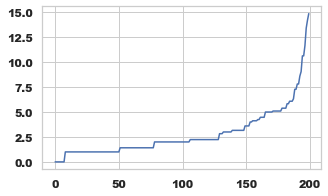

In [56]:
distances=np.sort(distances,axis=0) # sorting the distances
distances=distances[:,1] # taking the second column of the sorted distances
plt.rcParams["figure.figsize"]=(5,3) # setting the figure size
plt.plot(distances)
plt.show()

In [57]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8,min_samples=8).fit(X)
labels=dbscan.labels_

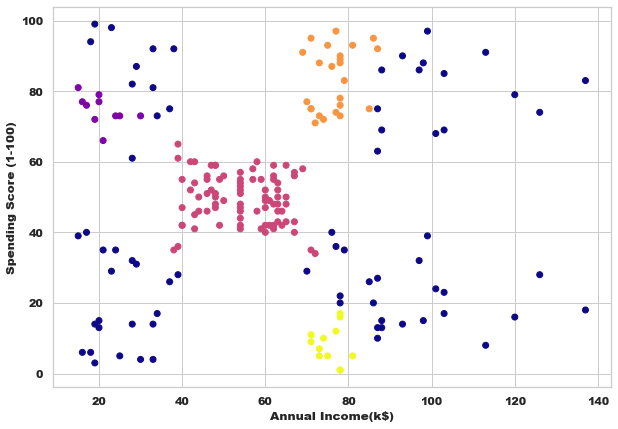

In [58]:
#Plotting the clusters

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=labels,cmap="plasma")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 3.Heirarchical Clustering

In [59]:
X3=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [60]:
X3

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [61]:
import scipy.cluster.hierarchy as sc

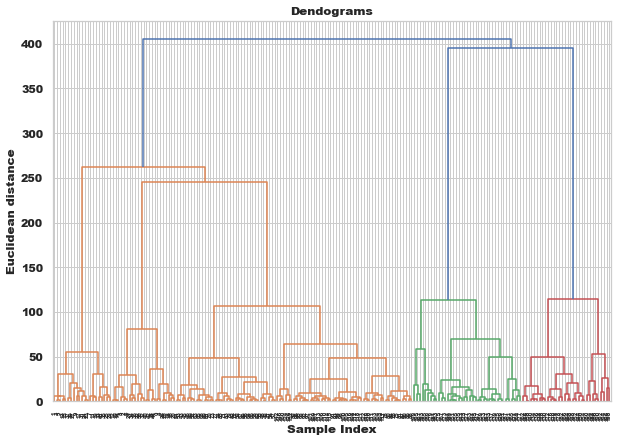

In [62]:
#plot dendrogram
plt.figure(figsize=(10,7))
plt.title("Dendograms")

#create dendrogram
sc.dendrogram(sc.linkage(X3,method="ward"))

plt.xlabel("Sample Index")
plt.ylabel("Euclidean distance")
plt.show()

By looking at above dendrogram we divide our data into 5 clusters

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit(X3)
labels=cluster.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

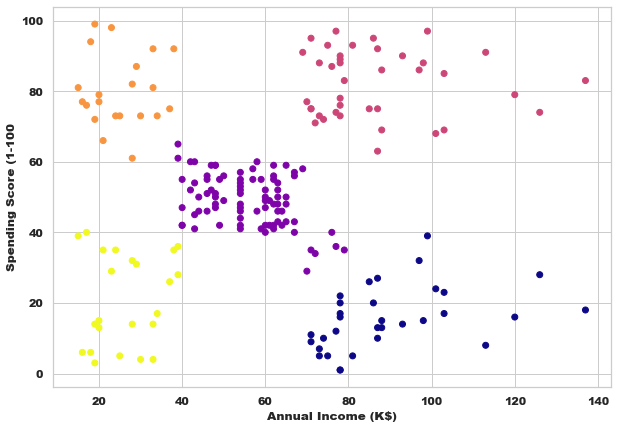

In [64]:
# visualise the cluster
plt.figure(figsize=(10,7))
plt.scatter(X3[:,0], X3[:,1],c=labels,cmap="plasma")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100")
plt.show()